<a href="https://colab.research.google.com/github/diegol99/CasoEstudio_RRHH/blob/main/RRHH_analitica3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Caso de estudio RRHH: Analitica 3
* Integrantes:
1. Diego Luna Paternina
2. Santiago Gomez Berrio
3. Maria Clara Salazar Duque

##Lectura y carga de datos:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
employee = "/content/drive/MyDrive/Analitica 3/Bases de datos/employee_survey_data.csv"
general= "/content/drive/MyDrive/Analitica 3/Bases de datos/general_data.csv"
in_time = "/content/drive/MyDrive/Analitica 3/Bases de datos/in_time.csv"
manager_survey= "/content/drive/MyDrive/Analitica 3/Bases de datos/manager_survey_data.csv"
out_time = "/content/drive/MyDrive/Analitica 3/Bases de datos/out_time.csv"
retirement= "/content/drive/MyDrive/Analitica 3/Bases de datos/retirement_info.csv"

In [ ]:
##Columna en común EmployeeID
df_employee=pd.read_csv(employee,sep= None,engine="python")
df_generaldt=pd.read_csv(general,sep= None,engine="python")
df_managers = pd.read_csv(manager_survey,sep= None,engine="python")
df_retire= pd.read_csv(retirement,sep= None,engine="python")
##Tiempos
df_intime=pd.read_csv(in_time,sep= None,engine="python")
df_outime = pd.read_csv(out_time,sep= None,engine="python")

In [ ]:
#convertir columnas de todos los df a miniscula
def convertirmin(df):
    df.columns = map(str.lower,df.columns)
convertirmin(df_employee)
convertirmin(df_generaldt)
convertirmin(df_managers)
convertirmin(df_retire)
convertirmin(df_intime)
convertirmin(df_outime)

In [ ]:
df2= pd.merge(df_generaldt,df_employee,on="employeeid",how="inner")
df_final = pd.merge(df2,df_managers,on="employeeid",how="inner")
df_retir = pd.merge(df_final,df_retire,on="employeeid",how="right")

## DF con todos los empleados:

In [ ]:
## No datos duplicados
print(df_final.duplicated().sum())

0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      4410 non-null   int64  
 1   businesstravel           4410 non-null   object 
 2   department               4410 non-null   object 
 3   distancefromhome         4410 non-null   int64  
 4   education                4410 non-null   int64  
 5   educationfield           4410 non-null   object 
 6   employeecount            4410 non-null   int64  
 7   employeeid               4410 non-null   int64  
 8   gender                   4410 non-null   object 
 9   joblevel                 4410 non-null   int64  
 10  jobrole                  4410 non-null   object 
 11  maritalstatus            4410 non-null   object 
 12  monthlyincome            4410 non-null   int64  
 13  numcompaniesworked       4391 non-null   float64
 14  over18                  

In [ ]:
df_final.describe()

,age,distancefromhome,education,employeecount,employeeid,joblevel,monthlyincome,numcompaniesworked,percentsalaryhike,standardhours,...,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [ ]:
df_final

,age,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,...,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


##Analisis exploratorio: Avance #1

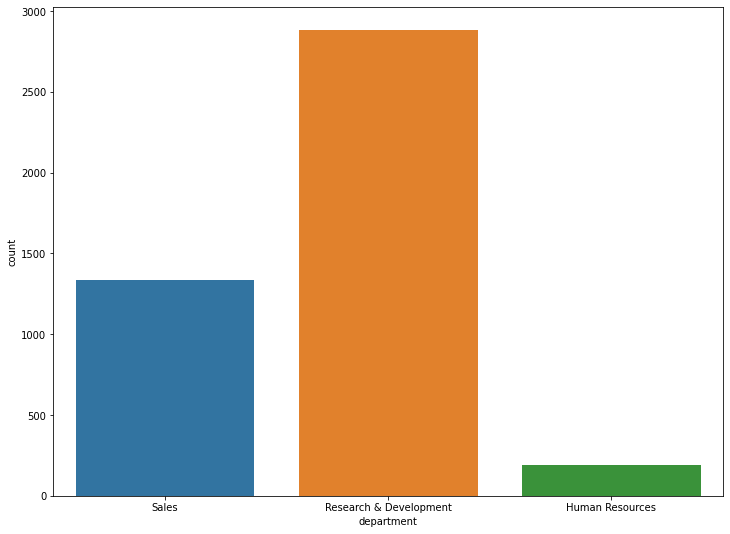

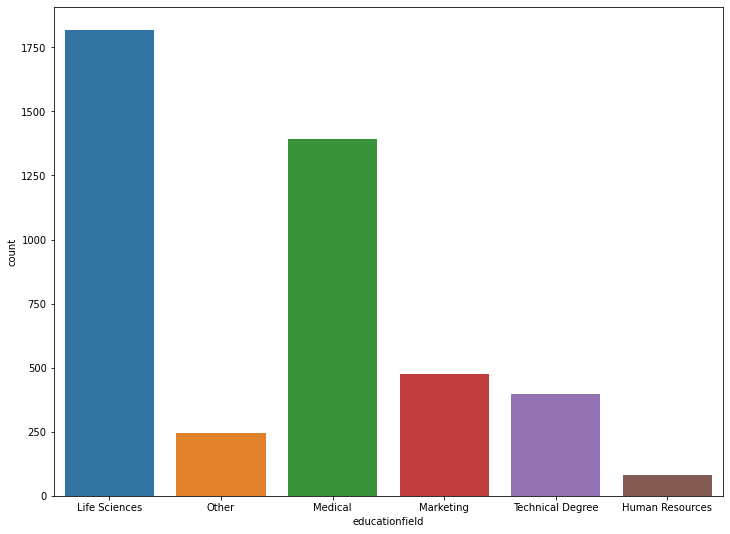

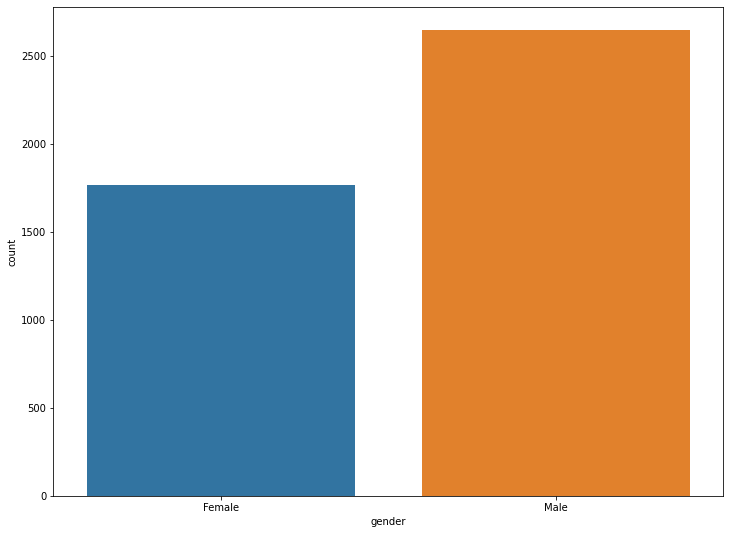

In [ ]:
variables1 = df_final[["department","educationfield","gender"]]
for i in variables1:
    plt.figure(figsize= (12,9))
    sns.countplot(x= variables1[i])

<AxesSubplot:>

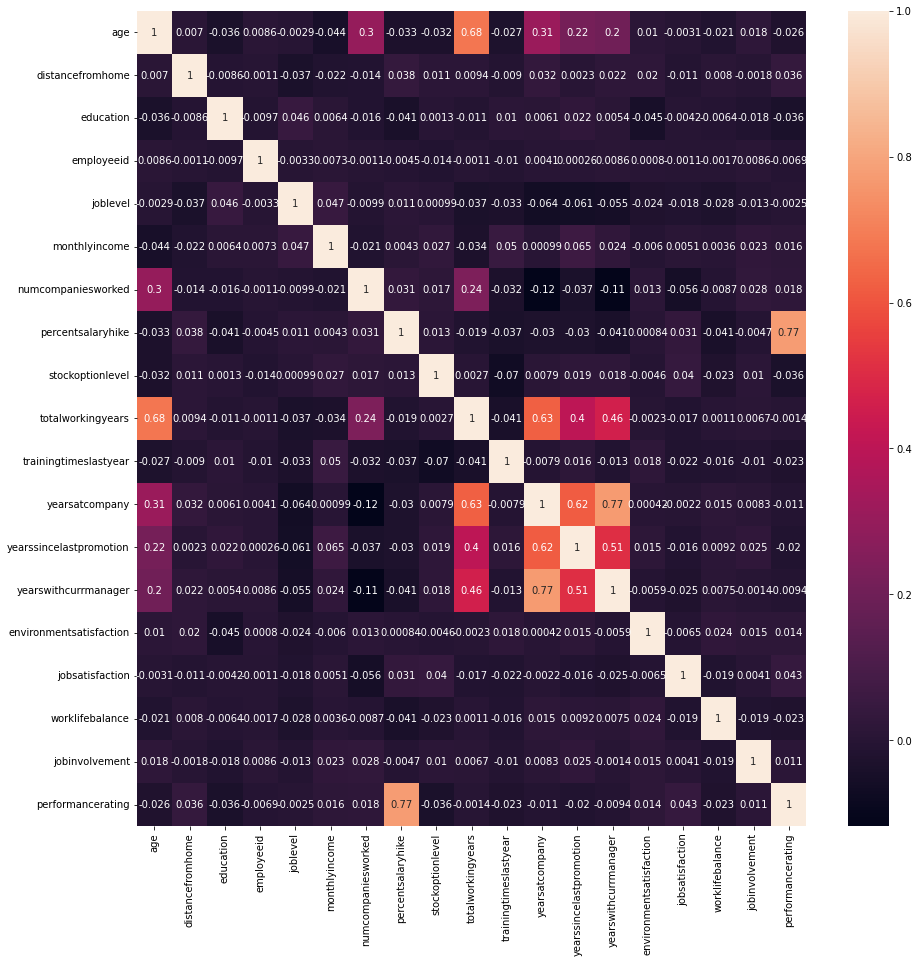

In [ ]:
corr_df = df_final.copy()
corr_df.drop(axis=1, columns=['employeecount','standardhours'], inplace=True)
plt.figure(figsize =(15,15))
sns.heatmap(corr_df.corr(),annot= True)

In [ ]:
##Información especifica 
##departamento de recursos humanos es muy pequeño a comparación de los otros
import plotly.express as px
basepie= df_final.groupby(["department"])[["employeecount"]].count().sort_values('employeecount', ascending = False).reset_index()
empl = df_final["employeecount"].sum()

fig = px.pie(basepie, values = 'employeecount',names="department",hole= .5,
                color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
    annotations = [dict(text = str(empl), x=0.5, y = 0.5, font_size = 40, showarrow = False )])
fig.show()

<AxesSubplot:xlabel='department', ylabel='count'>

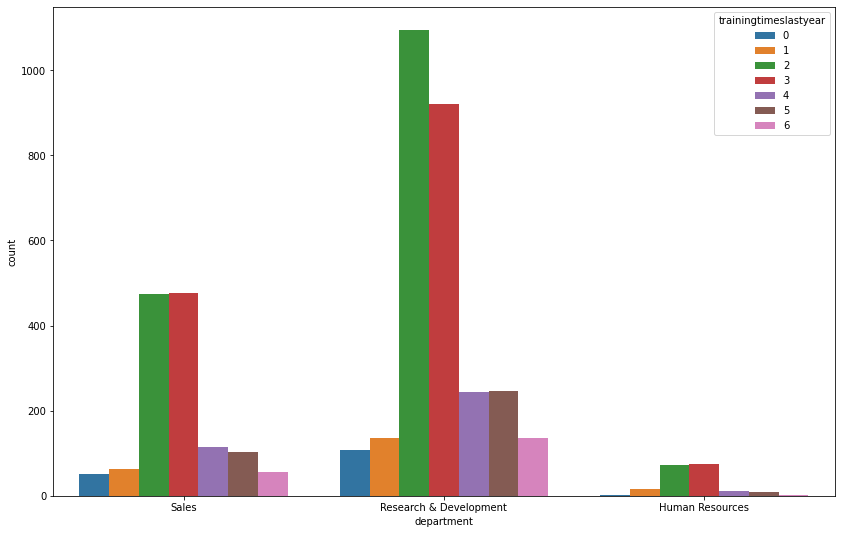

In [ ]:
##Número de capacitaciones de los empleados que se encuentran en la empresa ----> df_final
plt.figure(figsize = (14,9))
sns.countplot(data=df_final,x="department",hue="trainingtimeslastyear")

<AxesSubplot:xlabel='department', ylabel='count'>

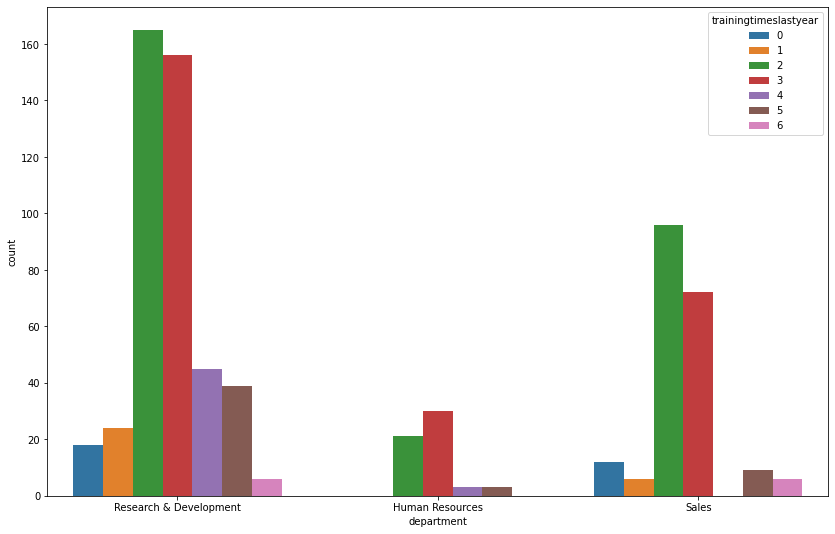

In [ ]:
##Número de capacitaciones de los empleados que se encuentran en la empresa ----> df_retirados
plt.figure(figsize = (14,9))
sns.countplot(data=df_retir,x="department",hue="trainingtimeslastyear")

In [ ]:
## Numero de capacitaciones de acuerdo a su satisfacción  df---->retirados
# Tabla de contingencia jobsatisfacion / capacitaciones
pd.crosstab(index=df_retir["jobsatisfaction"],
            columns=df_retir['trainingtimeslastyear'], margins=True)

trainingtimeslastyear,0,1,2,3,4,5,6,All
jobsatisfaction,,,,,,,,
1.0,15,6,75,68,15,18,0,197
2.0,6,21,45,48,9,9,0,138
3.0,6,3,87,90,12,9,12,219
4.0,3,0,75,51,12,15,0,156
All,30,30,282,257,48,51,12,710


In [ ]:
##Boxplot de las razones de retiro por departamento---> df retirados
fig = px.box(df_retir, x="resignationreason" , y='jobsatisfaction', color="department")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
# Tabla de contingencia aumento o promocion /edad
pd.crosstab(index=df_final["age"],
            columns=df_final["yearssincelastpromotion"], margins=True)

yearssincelastpromotion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,All
age,,,,,,,,,,,,,,,,,
18,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24
19,24,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27
20,18,9,6,0,0,0,0,0,0,0,0,0,0,0,0,0,33
21,9,18,12,0,0,0,0,0,0,0,0,0,0,0,0,0,39
22,18,15,15,0,0,0,0,0,0,0,0,0,0,0,0,0,48
23,24,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,42
24,33,27,12,6,0,0,0,0,0,0,0,0,0,0,0,0,78
25,33,30,12,0,0,3,0,0,0,0,0,0,0,0,0,0,78
26,45,39,9,3,3,6,0,12,0,0,0,0,0,0,0,0,117


In [ ]:
# Tabla de contingencia años en la compañia / promocion
pd.crosstab(index=df_retir["yearssincelastpromotion"],
            columns=df_retir['yearsatcompany'], margins=True)

yearsatcompany,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,31,32,33,40,All
yearssincelastpromotion,,,,,,,,,,,,,,,,,,,,,
0,48,153,9,24,27,27,18,6,3,6,...,0,0,0,0,0,0,0,0,0,330
1,0,24,9,24,27,27,9,6,3,3,...,0,0,0,0,3,0,0,3,0,147
2,0,0,63,12,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,81
3,0,0,0,0,3,3,0,3,0,3,...,3,0,0,0,0,0,0,0,0,27
4,0,0,0,0,0,3,0,3,3,3,...,0,0,0,0,0,0,0,0,0,15
5,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,6
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,18
7,0,0,0,0,0,0,0,12,18,9,...,0,0,0,0,0,0,0,0,0,48
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12


In [ ]:
###grafico años para ascendero ser jefe vs salario mensual
import plotly.express as px
df = df_final
fig = px.histogram(df, x="monthlyincome", color="yearswithcurrmanager")
fig.show()

In [ ]:
#boxplot influencia de lo que ganan mensualmente vs su razon e salida por genero
fig = px.box(df_retir, x="resignationreason" , y='monthlyincome', color="gender")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
#histohgrama relacion de salario mensual vs el numero de capacitaciones al año
import plotly.express as px
df = df_final
fig = px.histogram(df, x="monthlyincome", color="trainingtimeslastyear")
fig.show()

In [ ]:
# Tabla de contingencia departamento / capacitaciones ---> Df retirados
pd.crosstab(index=df_retir["department"],
            columns=df_retir['trainingtimeslastyear'], margins=True)

trainingtimeslastyear,0,1,2,3,4,5,6,All
department,,,,,,,,
Human Resources,0,0,21,30,3,3,0,57
Research & Development,18,24,165,156,45,39,6,453
Sales,12,6,96,72,0,9,6,201
All,30,30,282,258,48,51,12,711


In [ ]:
# Tabla de contingencia Resignacion / capacitaciones
pd.crosstab(index=df_retir["resignationreason"],
            columns=df_retir['trainingtimeslastyear'], margins=True)

trainingtimeslastyear,0,1,2,3,4,5,6,All
resignationreason,,,,,,,,
Others,17,11,124,122,21,21,7,323
Salary,6,13,78,67,13,10,2,189
Stress,4,4,57,42,9,13,0,129
All,27,28,259,231,43,44,9,641


In [ ]:
# Tabla de contingencia departamento/Eduacionfield ---> df_retirados
pd.crosstab(index=df_retir["department"],
            columns=df_retir["educationfield"], margins=True)

educationfield,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
department,,,,,,,
Human Resources,33,9,0,9,0,6,57
Research & Development,0,222,0,186,21,24,453
Sales,0,72,75,30,9,15,201
All,33,303,75,225,30,45,711


In [ ]:
# Tabla de contingencia departamento/Eduacionfield ---> df_final
pd.crosstab(index=df_final["department"],
            columns=df_final["educationfield"], margins=True)

educationfield,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
department,,,,,,,
Human Resources,81,48,0,39,9,12,189
Research & Development,0,1320,0,1089,192,282,2883
Sales,0,450,477,264,45,102,1338
All,81,1818,477,1392,246,396,4410


<AxesSubplot:xlabel='educationfield'>

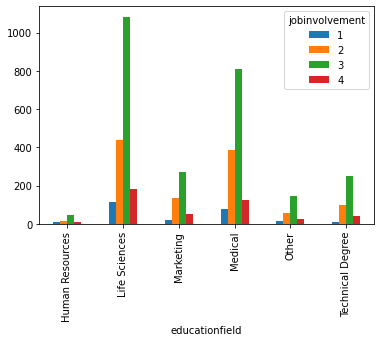

In [ ]:
#Estudios de las personas y qué tanto están involucradas en el trabajo.
pd.crosstab(index=df_final['educationfield'],
            columns=df_final['jobinvolvement']).plot(kind='bar') 

In [ ]:
####boxplot relacion de lo que ganan mensualmente vs su razon de retiro por nivel de trabajo
fig = px.box(df_retir, x="resignationreason" , y='monthlyincome', color="joblevel")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
# Tabla de contingencia Nivel de trabajo/nivel de satisfación <----Df final
pd.crosstab(index=df_final["joblevel"],
            columns=df_final["jobsatisfaction"], margins=True)

jobsatisfaction,1.0,2.0,3.0,4.0,All
joblevel,,,,,
1,298,306,499,513,1616
2,311,294,501,493,1599
3,134,150,189,179,652
4,78,54,75,110,317
5,39,36,59,72,206
All,860,840,1323,1367,4390


In [ ]:
# Tabla de contingencia education field/nivel de satisfacion <----df final 
pd.crosstab(index=df_final["educationfield"],
            columns=df_final["jobsatisfaction"], margins=True)

jobsatisfaction,1.0,2.0,3.0,4.0,All
educationfield,,,,,
Human Resources,15,24,24,18,81
Life Sciences,360,318,528,599,1805
Marketing,78,87,144,168,477
Medical,271,285,438,394,1388
Other,59,51,69,65,244
Technical Degree,77,75,120,123,395
All,860,840,1323,1367,4390


In [ ]:
##Boxplo departamento vs nivel de satisfacion por genro df final
fig = px.box(df_final, x='department' , y="jobsatisfaction", color="gender")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
# Tabla de contingencia años dedsde la ultima promocion / capacitaciones
pd.crosstab(index=df_retir["yearssincelastpromotion"],
            columns=df_retir['trainingtimeslastyear'], margins=True)

trainingtimeslastyear,0,1,2,3,4,5,6,All
yearssincelastpromotion,,,,,,,,
0,15,15,144,108,9,27,12,330
1,3,3,60,60,12,9,0,147
2,0,3,18,36,18,6,0,81
3,6,0,9,6,0,6,0,27
4,3,3,3,6,0,0,0,15
5,0,0,0,6,0,0,0,6
6,3,0,9,6,0,0,0,18
7,0,3,21,15,6,3,0,48
9,0,0,3,6,3,0,0,12


##  Analisis Exploratorio: DF retirados



1.   Revisar tiempo de capacitación. Esto puede afectar el rendimiento de los que se han retirado
2.   Buscar si las tareas asignadas al principio de la contratación son las mismas a la hora del retiro. Al poner trabajos adicionales, en diferente área y sin remuneración puede afectar.
3. Verificar los datos duplicados, atipicos.
4. Las personas que están asignando a los problemas,no tienen que ver con educación o area encargad



In [ ]:
#dataset con solo los que se han retirado. Información completa
##Edad común de retiro ?
## Nivel de participación Jobinvolment
## Salario justificable? 
df_retir = pd.merge(df_final,df_retire,on="employeeid",how="right")
df_retir.columns = map(str.lower,df_retir.columns)

In [ ]:
df_retir

,age,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,...,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating,attrition,retirementdate,retirementtype,resignationreason
0,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,4,3.0,2.0,4.0,2,4,Yes,15/10/2016,Resignation,Others
1,28,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,2,...,0,1.0,3.0,1.0,3,4,Yes,20/07/2016,Resignation,Stress
2,47,Non-Travel,Research & Development,1,1,Medical,1,14,Male,1,...,9,1.0,2.0,2.0,2,3,Yes,08/11/2016,Resignation,Others
3,44,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,2,...,0,4.0,3.0,1.0,2,3,Yes,15/10/2016,Resignation,Others
4,26,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,3,...,2,1.0,2.0,3.0,2,3,Yes,08/02/2016,Resignation,Salary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,29,Travel_Rarely,Research & Development,7,1,Life Sciences,1,4382,Female,1,...,1,3.0,4.0,2.0,3,4,Yes,18/04/2016,Resignation,Salary
707,33,Travel_Rarely,Sales,11,4,Marketing,1,4387,Male,1,...,4,3.0,4.0,1.0,2,4,Yes,16/09/2016,Resignation,Others
708,33,Travel_Rarely,Sales,1,3,Life Sciences,1,4389,Male,2,...,7,1.0,1.0,4.0,3,3,Yes,24/05/2016,Resignation,Others
709,32,Travel_Rarely,Sales,23,1,Life Sciences,1,4392,Male,3,...,2,4.0,3.0,1.0,3,3,Yes,26/02/2016,Fired,NaN


In [ ]:
df_retir.describe()

,age,distancefromhome,education,employeecount,employeeid,joblevel,monthlyincome,numcompaniesworked,percentsalaryhike,standardhours,...,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
count,711.000000,711.000000,711.000000,711.0,711.000000,711.000000,711.000000,707.000000,711.000000,711.0,...,709.000000,711.000000,711.000000,711.000000,711.000000,706.000000,710.000000,707.000000,711.000000,711.000000
mean,33.607595,9.012658,2.877637,1.0,2191.767932,2.037975,61682.616034,2.936351,15.481013,8.0,...,8.255289,2.654008,5.130802,1.945148,2.852321,2.468839,2.470423,2.660537,2.704641,3.172996
std,9.675693,7.772368,1.014233,0.0,1270.136654,1.057485,44792.067695,2.678774,3.775289,0.0,...,7.164018,1.154834,5.941598,3.148633,3.138918,1.166807,1.115906,0.816377,0.761739,0.378510
min,18.000000,1.000000,1.000000,1.0,2.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,28.000000,2.000000,2.000000,1.0,1072.000000,1.000000,28440.000000,1.000000,12.000000,8.0,...,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000
50%,32.000000,7.000000,3.000000,1.0,2165.000000,2.000000,49080.000000,1.000000,14.000000,8.0,...,7.000000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,39.000000,15.000000,4.000000,1.0,3341.000000,2.000000,71040.000000,5.000000,18.000000,8.0,...,10.000000,3.000000,7.000000,2.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000
max,58.000000,29.000000,5.000000,1.0,4403.000000,5.000000,198590.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,14.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [ ]:
##Verificar esa clasificación de otras. Especificar que puede ser
df_retir["resignationreason"].value_counts()

Others    323
Salary    189
Stress    129
Name: resignationreason, dtype: int64

In [ ]:
##Mayor cantidad de personas están de acuerdo(365)--->> Muy a la par de las que no(341)
df_retir["environmentsatisfaction"].value_counts()

1.0    213
3.0    186
4.0    179
2.0    128
Name: environmentsatisfaction, dtype: int64

In [ ]:
df_retir["numcompaniesworked"].value_counts()

1.0    293
0.0     69
7.0     51
4.0     50
2.0     48
3.0     48
6.0     48
5.0     46
9.0     36
8.0     18
Name: numcompaniesworked, dtype: int64

In [ ]:
##df con nulos
dfcon = df_retir.copy()
dfcon

,age,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,...,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating,attrition,retirementdate,retirementtype,resignationreason
0,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,4,3.0,2.0,4.0,2,4,Yes,15/10/2016,Resignation,Others
1,28,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,2,...,0,1.0,3.0,1.0,3,4,Yes,20/07/2016,Resignation,Stress
2,47,Non-Travel,Research & Development,1,1,Medical,1,14,Male,1,...,9,1.0,2.0,2.0,2,3,Yes,08/11/2016,Resignation,Others
3,44,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,2,...,0,4.0,3.0,1.0,2,3,Yes,15/10/2016,Resignation,Others
4,26,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,3,...,2,1.0,2.0,3.0,2,3,Yes,08/02/2016,Resignation,Salary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,29,Travel_Rarely,Research & Development,7,1,Life Sciences,1,4382,Female,1,...,1,3.0,4.0,2.0,3,4,Yes,18/04/2016,Resignation,Salary
707,33,Travel_Rarely,Sales,11,4,Marketing,1,4387,Male,1,...,4,3.0,4.0,1.0,2,4,Yes,16/09/2016,Resignation,Others
708,33,Travel_Rarely,Sales,1,3,Life Sciences,1,4389,Male,2,...,7,1.0,1.0,4.0,3,3,Yes,24/05/2016,Resignation,Others
709,32,Travel_Rarely,Sales,23,1,Life Sciences,1,4392,Male,3,...,2,4.0,3.0,1.0,3,3,Yes,26/02/2016,Fired,NaN


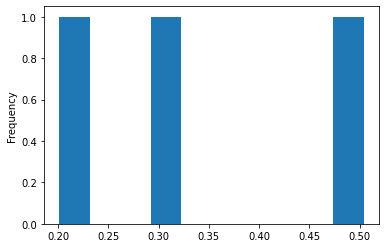

In [ ]:
## Distribución de la variable resignationreason, la cual, es la que contiene más datos nulos
def distribucion_variable_categorica(col):
    df_retir[col].value_counts(ascending=True,normalize=True).tail(20).plot.hist()
    plt.show()
distribucion_variable_categorica('resignationreason')

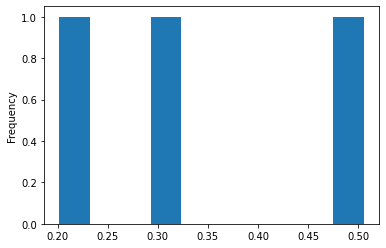

In [ ]:
## Distribución de la variable resignationreason sin nulos
dfsin = df_retir.dropna()
def distribucion_variable_categorica1(col):
    dfsin[col].value_counts(normalize=True).tail(20).plot.hist()
    plt.show()
distribucion_variable_categorica1("resignationreason")

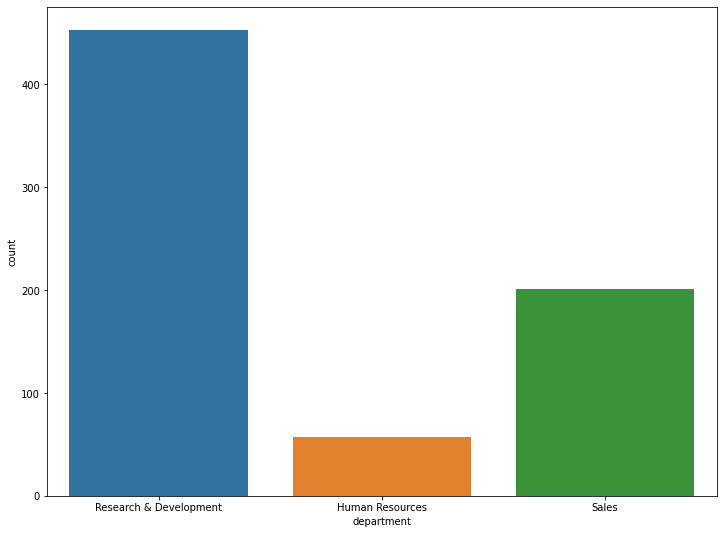

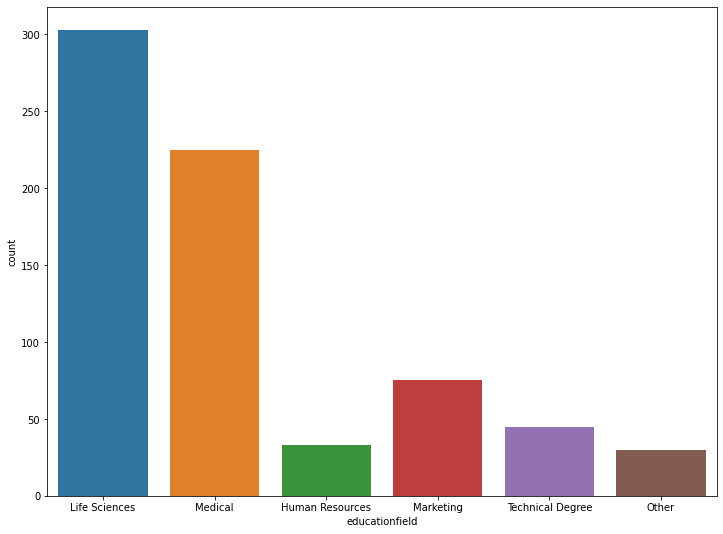

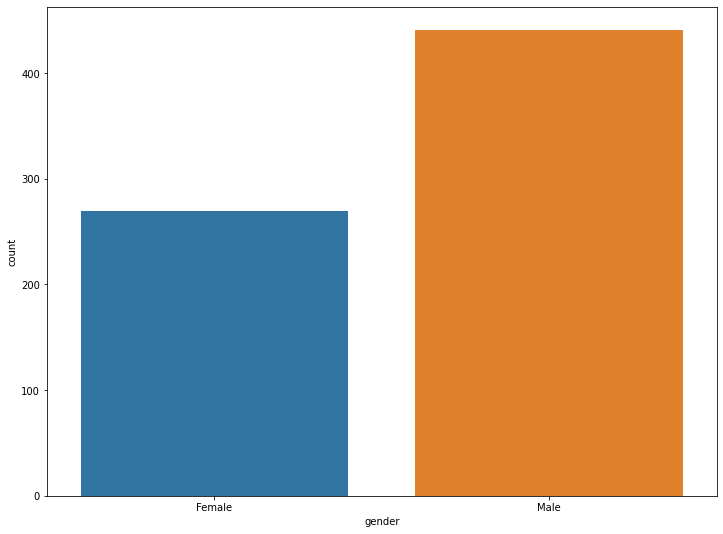

In [ ]:
##No viajan mucho las personas que se retiraron
## El departamento de research & developmen es donde más se retiran, segundo ventas.
##Las personas que estudiaron ciencias de la vida y medicina son las que más se retiran
## se retiran más los hombres que las mujeres
##las personas abandonan el puesto m resignación
import seaborn as sns
variables = dfcon[["department","educationfield","gender"]]
for i in variables:
    plt.figure(figsize= (12,9))
    sns.countplot(x= variables[i])

<AxesSubplot:xlabel='educationfield'>

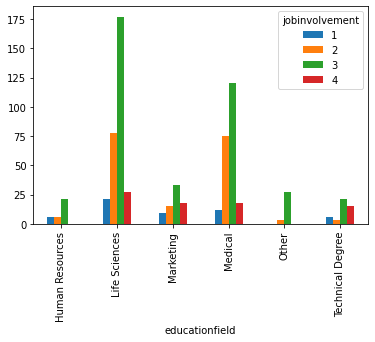

In [ ]:
## Que tanto estuvieron involucrados las personas retiradas en proyectos segun sus estudios
pd.crosstab(index=df_retir['educationfield'],
            columns=df_retir['jobinvolvement']).plot(kind='bar') 

<AxesSubplot:xlabel='department'>

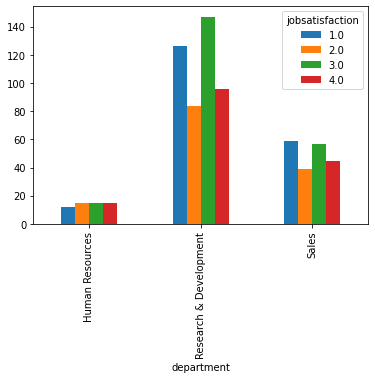

In [ ]:
## Cantidad de personas segun su departamento y qué satisfechos están.
pd.crosstab(index=df_retir['department'],
            columns=df_retir['jobsatisfaction']).plot(kind='bar') 

<AxesSubplot:xlabel='department', ylabel='count'>

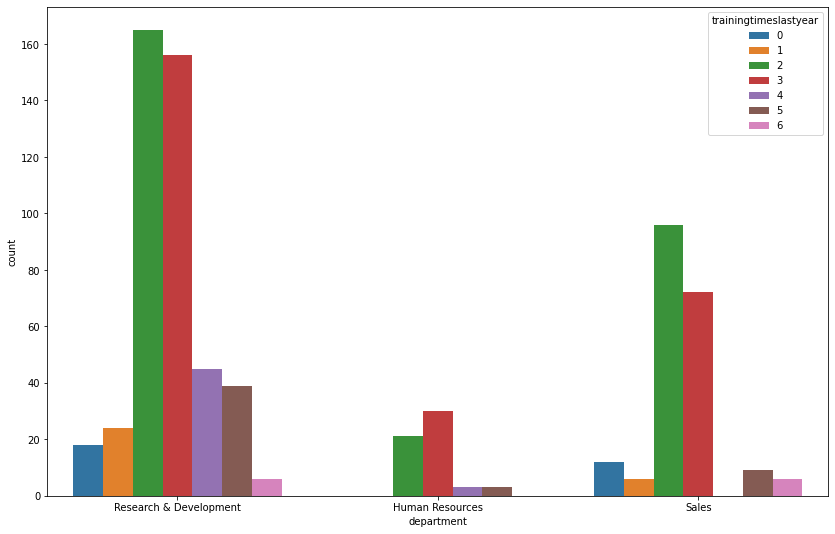

In [ ]:
## De los retirados de los diferentes departamentos, se realizaron de 2 a 3 capacitaciones
plt.figure(figsize = (14,9))
sns.countplot(data=df_retir,x="department",hue="trainingtimeslastyear")

In [ ]:
## Porcentaje de empleados por departament
import plotly.express as px
basepie= df_retir.groupby(["department"])[["employeecount"]].count().sort_values('employeecount', ascending = False).reset_index()
empl1 = df_retir["employeecount"].sum()

fig = px.pie(basepie, values = 'employeecount',names="department",hole= .5,
                color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
    annotations = [dict(text = str(empl1), x=0.5, y = 0.5, font_size = 40, showarrow = False )])
fig.show()

In [ ]:
df_retir['retirementdate'] = pd.to_datetime(df_retir['retirementdate']) # Convertir la fecha en el formato correcto
df_retir["retirementdate"] = df_retir["retirementdate"].dt.month
retfecha= df_retir.groupby(["retirementdate"])[["employeecount"]].count().reset_index()
fig = px.line(retfecha, x='retirementdate', y =['employeecount'], title = '<b>Evolución de retiros de los empleados<b>',
              color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
    legend_title = 'Despidos:',
    xaxis_title = '<b>Fecha<b>',
    yaxis_title = '<b>Cantidad de casos<b>',
)

fig.show()

In [ ]:
retfecha

,retirementdate,employeecount
0,1,72
1,2,61
2,3,62
3,4,55
4,5,69
5,6,63
6,7,77
7,8,59
8,9,46
9,10,61


## Selección de variables:

In [ ]:
df_final1 = pd.merge(df_final,df_retire,on='employeeid',how= 'outer')
dic2 = ['atrittion','retirementdate','retirementtype','resignationreason']
for i in dic2:
    df_final1.replace(np.nan,'No Aplica',inplace=True)

In [ ]:
df_final1["retirementtype"].replace('Fired','Otro motivo',inplace=True)

In [ ]:
##Otro motivo son aquellas personas que se despidieron. 
##Para efectos del modelo, estas de cambian debido a que solo se van a predecir las renuncias
df_final1["retirementtype"].value_counts()

No Aplica      3699
Resignation     641
Otro motivo      70
Name: retirementtype, dtype: int64

In [ ]:
##Dejamos por fuera a los que despidieron porque nuestro modelo se basa en los RETIRADOS #Mejor lo llamamos renuncias 
df_final1["salaryhike"] = df_final1['percentsalaryhike'].apply(lambda x: x/100)
df_final1["renuncia"] = df_final1["retirementtype"].apply(lambda x: 0 if x != 'Resignation' else 1)

In [ ]:
fill = ["numcompaniesworked","totalworkingyears"]
for i in fill:
    df_final1[i].replace(np.nan,0,inplace= True)

In [ ]:
#'retirementtype',	'resignationreason' eliminarlas tambien 
df_final1.drop(columns=['employeecount','standardhours','over18','percentsalaryhike','retirementdate','retirementtype','resignationreason'], axis= 1,inplace=True)

In [ ]:
##Rellenar aleatoriamente los nulos entre minimo y media
df_final1["environmentsatisfaction"]= df_final1["environmentsatisfaction"].apply(lambda x: x if not pd.isnull(x) else np.random.choice(range(int(df_final1['environmentsatisfaction'].min()),int(df_final1['environmentsatisfaction'].mean()))))
df_final1["jobsatisfaction"]= df_final1["jobsatisfaction"].apply(lambda x: x if not pd.isnull(x) else np.random.choice(range(int(df_final1['jobsatisfaction'].min()),int(df_final1['jobsatisfaction'].mean()))))
df_final1["worklifebalance"]= df_final1["worklifebalance"].apply(lambda x: x if not pd.isnull(x) else np.random.choice(range(int(df_final1['worklifebalance'].min()),int(df_final1['worklifebalance'].mean()))))

<AxesSubplot:>

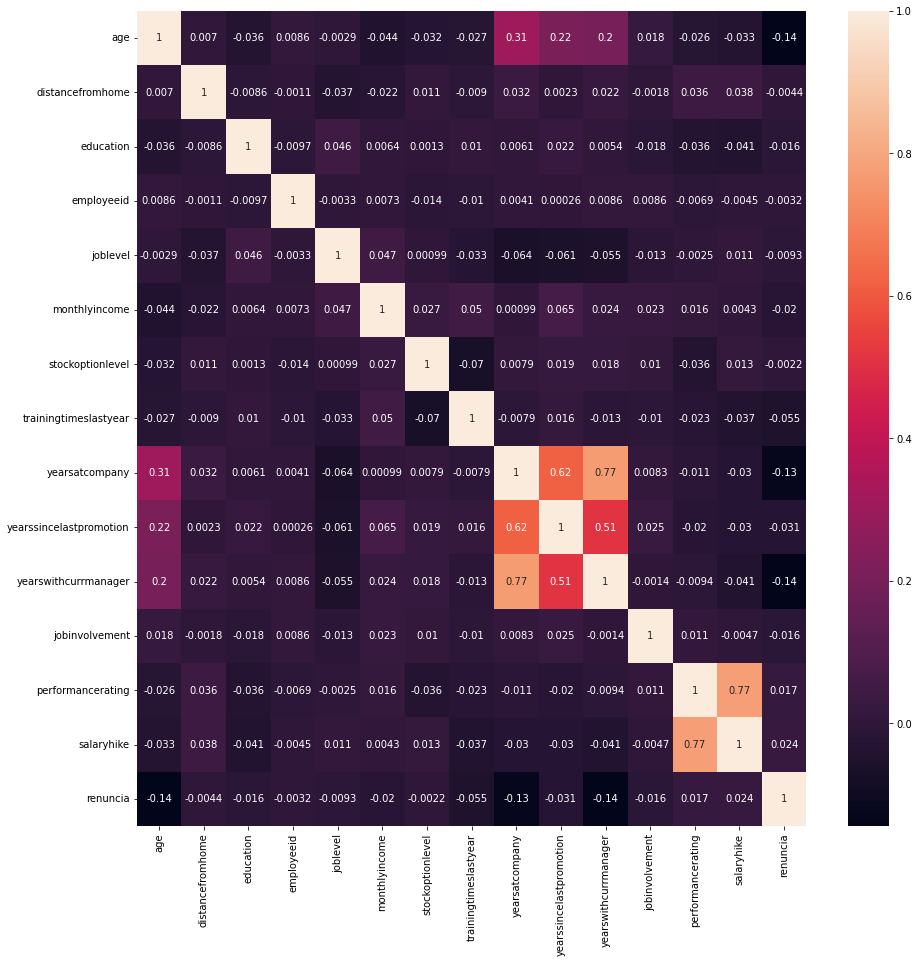

In [ ]:
plt.figure(figsize =(15,15))
sns.heatmap(df_final1.corr(),annot= True)

In [ ]:
##Correlaciones
x = df_final1.corr().unstack().sort_values()
x[x<1].tail(10)

age                      yearsatcompany             0.311309
yearsatcompany           age                        0.311309
yearssincelastpromotion  yearswithcurrmanager       0.510224
yearswithcurrmanager     yearssincelastpromotion    0.510224
yearsatcompany           yearssincelastpromotion    0.618409
yearssincelastpromotion  yearsatcompany             0.618409
yearsatcompany           yearswithcurrmanager       0.769212
yearswithcurrmanager     yearsatcompany             0.769212
salaryhike               performancerating          0.773550
performancerating        salaryhike                 0.773550
dtype: float64

In [ ]:
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      4410 non-null   int64  
 1   businesstravel           4410 non-null   object 
 2   department               4410 non-null   object 
 3   distancefromhome         4410 non-null   int64  
 4   education                4410 non-null   int64  
 5   educationfield           4410 non-null   object 
 6   employeeid               4410 non-null   int64  
 7   gender                   4410 non-null   object 
 8   joblevel                 4410 non-null   int64  
 9   jobrole                  4410 non-null   object 
 10  maritalstatus            4410 non-null   object 
 11  monthlyincome            4410 non-null   int64  
 12  numcompaniesworked       4410 non-null   object 
 13  stockoptionlevel         4410 non-null   int64  
 14  totalworkingyears       

In [ ]:
df_final1["attrition"].value_counts()

No Aplica    3699
Yes           711
Name: attrition, dtype: int64

In [ ]:
##Dummies
dummies= pd.get_dummies(df_final1, columns=["businesstravel","department","educationfield","gender","jobrole","maritalstatus","attrition"])
dummies

,age,distancefromhome,education,employeeid,joblevel,monthlyincome,numcompaniesworked,stockoptionlevel,totalworkingyears,trainingtimeslastyear,...,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,attrition_No Aplica,attrition_Yes
0,51,6,2,1,1,131160,1.0,0,1.0,6,...,0,0,0,0,0,0,1,0,1,0
1,31,10,1,2,1,41890,0.0,1,6.0,3,...,0,0,1,0,0,0,0,1,0,1
2,32,17,4,3,4,193280,1.0,3,5.0,2,...,0,0,0,1,0,0,1,0,1,0
3,38,2,5,4,3,83210,3.0,3,13.0,5,...,0,0,0,0,0,0,1,0,1,0
4,32,10,1,5,1,23420,4.0,2,9.0,2,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,4406,1,60290,3.0,1,10.0,5,...,0,0,1,0,0,0,0,1,1,0
4406,29,2,4,4407,1,26790,2.0,0,10.0,2,...,0,0,0,0,0,1,0,0,1,0
4407,25,25,2,4408,2,37020,0.0,0,5.0,4,...,0,0,0,1,0,0,1,0,1,0
4408,42,18,2,4409,1,23980,0.0,1,10.0,2,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
dummies.replace("No Aplica",0,inplace= True)

In [ ]:
##arreglos
X= dummies.drop(["renuncia"],axis = 1)
y = dummies.renuncia

In [ ]:
from sklearn.preprocessing import MinMaxScaler
escalador = MinMaxScaler()
dReescalados = escalador.fit_transform(X)
#set_printoptions(precision=2)
print(dReescalados)

[[0.78571429 0.17857143 0.25       ... 0.         1.         0.        ]
 [0.30952381 0.32142857 0.         ... 1.         0.         1.        ]
 [0.33333333 0.57142857 0.75       ... 0.         1.         0.        ]
 ...
 [0.16666667 0.85714286 0.25       ... 0.         1.         0.        ]
 [0.57142857 0.60714286 0.25       ... 0.         1.         0.        ]
 [0.52380952 0.96428571 0.5        ... 0.         1.         0.        ]]


In [ ]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler().fit(X)
dEstandarizados = escalador.transform(X)
dEstandarizados

array([[ 1.54136892, -0.39393818, -0.89168825, ..., -0.68556546,
         0.4384223 , -0.4384223 ],
       [-0.64866811,  0.09963874, -1.86842575, ...,  1.45864991,
        -2.28090588,  2.28090588],
       [-0.53916626,  0.96339837,  1.06178675, ..., -0.68556546,
         0.4384223 , -0.4384223 ],
       ...,
       [-1.30567922,  1.95055222, -0.89168825, ..., -0.68556546,
         0.4384223 , -0.4384223 ],
       [ 0.55585225,  1.0867926 , -0.89168825, ..., -0.68556546,
         0.4384223 , -0.4384223 ],
       [ 0.33684855,  2.32073492,  0.08504925, ..., -0.68556546,
         0.4384223 , -0.4384223 ]])

In [ ]:
from sklearn.preprocessing import Normalizer

escalador = Normalizer().fit(X)
dEstandarizados = escalador.transform(X)
dEstandarizados

array([[3.88838029e-04, 4.57456505e-05, 1.52485502e-05, ...,
        0.00000000e+00, 7.62427509e-06, 0.00000000e+00],
       [7.40033165e-04, 2.38720376e-04, 2.38720376e-05, ...,
        2.38720376e-05, 0.00000000e+00, 2.38720376e-05],
       [1.65562911e-04, 8.79552963e-05, 2.06953638e-05, ...,
        0.00000000e+00, 5.17384096e-06, 0.00000000e+00],
       ...,
       [6.70573396e-04, 6.70573396e-04, 5.36458717e-05, ...,
        0.00000000e+00, 2.68229359e-05, 0.00000000e+00],
       [1.72258195e-03, 7.38249407e-04, 8.20277119e-05, ...,
        0.00000000e+00, 4.10138560e-05, 0.00000000e+00],
       [7.29160926e-04, 5.10412648e-04, 5.46870695e-05, ...,
        0.00000000e+00, 1.82290232e-05, 0.00000000e+00]])

##Nuevo dataset:

In [ ]:
#crear un modelo de selección
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

est_prueba = SelectKBest(score_func=f_classif, k='all')
est_ajustado = est_prueba.fit(X,y)

#Muestro el desempeño de los features basado en el valor F
set_printoptions(precision=3, suppress= True)
est_ajustado.scores_
#features = est_ajustado.transform(dCod)
#features 
##Se seleccionan los puntajes > 13: age,stockoptionlevel,totalworkingyears,traininglastyears,yearssincelastpromotion,yearwithcurmanager,jobsatisfaction
##salaryhike,attrittion, businesstravel,department,jobrole,numcompaniedworked,enviromentsatisfaction

array([   90.578,     0.085,     1.104,     0.044,     0.381,     1.715,
          11.026,     0.021,   113.778,    13.177,    73.639,     4.247,
          94.194,    35.001,    38.878,    14.176,     1.154,     1.253,
           2.438,    22.337,    52.935,     9.548,    31.527,     0.814,
           2.346,    37.728,     0.716,     0.103,     0.24 ,     2.085,
           4.108,     0.222,     0.222,     0.843,     0.722,     0.053,
           2.539,     7.6  ,     7.076,     1.841,     2.028,     0.602,
          28.255,    32.712,   120.097, 33856.91 , 33856.91 ])

In [ ]:
##age,totalworkingyears,yearsatcompany,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,attrition,businesstravel,department,educationfield,maritalstatus
dummies.columns

Index(['age', 'distancefromhome', 'education', 'employeeid', 'joblevel',
       'monthlyincome', 'numcompaniesworked', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager',
       'environmentsatisfaction', 'jobsatisfaction', 'worklifebalance',
       'jobinvolvement', 'performancerating', 'salaryhike', 'renuncia',
       'businesstravel_Non-Travel', 'businesstravel_Travel_Frequently',
       'businesstravel_Travel_Rarely', 'department_Human Resources',
       'department_Research & Development', 'department_Sales',
       'educationfield_Human Resources', 'educationfield_Life Sciences',
       'educationfield_Marketing', 'educationfield_Medical',
       'educationfield_Other', 'educationfield_Technical Degree',
       'gender_Female', 'gender_Male', 'jobrole_Healthcare Representative',
       'jobrole_Human Resources', 'jobrole_Laboratory Technician',
       'jobrole_Manager', 'jobrole_Manuf

In [ ]:
##df_modelo = df_final1[["age","stockoptionlevel","totalworkingyears","trainingtimeslastyear","yearssincelastpromotion",
##                     "yearswithcurrmanager","jobsatisfaction","salaryhike","attrition", "businesstravel",
##                     "department","jobrole","resignationreason","retirementtype","numcompaniesworked","environmentsatisfaction"]]

In [ ]:
df_modelo = df_final1[["age","employeeid","totalworkingyears","yearsatcompany","yearswithcurrmanager","environmentsatisfaction",
                   "jobsatisfaction","attrition","businesstravel","department","educationfield","maritalstatus"
                   ,"distancefromhome","worklifebalance"]]


In [ ]:
df_modelo.columns

Index(['age', 'employeeid', 'totalworkingyears', 'yearsatcompany',
       'yearswithcurrmanager', 'environmentsatisfaction', 'jobsatisfaction',
       'attrition', 'businesstravel', 'department', 'educationfield',
       'maritalstatus', 'distancefromhome', 'worklifebalance'],
      dtype='object')

In [ ]:
df_modelo.replace("No Aplica",0,inplace= True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dum_modelo = pd.get_dummies(df_modelo)
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(dum_modelo)
data = pd.DataFrame(data_scaled, columns=dum_modelo.columns)

In [ ]:

from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
x, y = make_classification(n_samples=1800, n_features=15, 
                           n_classes=2, 
                           n_clusters_per_class=1)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

In [ ]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()


LinearSVC()

In [ ]:
lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.9196078431372549


In [ ]:
cv_scores = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.91


**Predicting and accuracy check**

In [ ]:
ypred = lsvc.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

[[117  11]
 [  9 133]]


In [ ]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       128
           1       0.92      0.94      0.93       142

    accuracy                           0.93       270
   macro avg       0.93      0.93      0.93       270
weighted avg       0.93      0.93      0.93       270



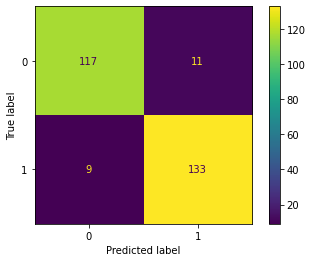

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

lsvc.fit(xtrain, ytrain)
predicted = lsvc.predict(xtest)
matrix = confusion_matrix(ytest, predicted)
display = ConfusionMatrixDisplay(confusion_matrix = matrix)
display.plot()
plt.show()

KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
range_k = range(1,15)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(xtrain, ytrain)
   ypred = classifier.predict(xtest)
   scores[k] = metrics.accuracy_score(ytest,ypred)
   scores_list.append(metrics.accuracy_score(ytest,ypred))
result = metrics.confusion_matrix(ytest, ypred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(ytest, ypred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[108  20]
 [  6 136]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       128
           1       0.87      0.96      0.91       142

    accuracy                           0.90       270
   macro avg       0.91      0.90      0.90       270
weighted avg       0.91      0.90      0.90       270



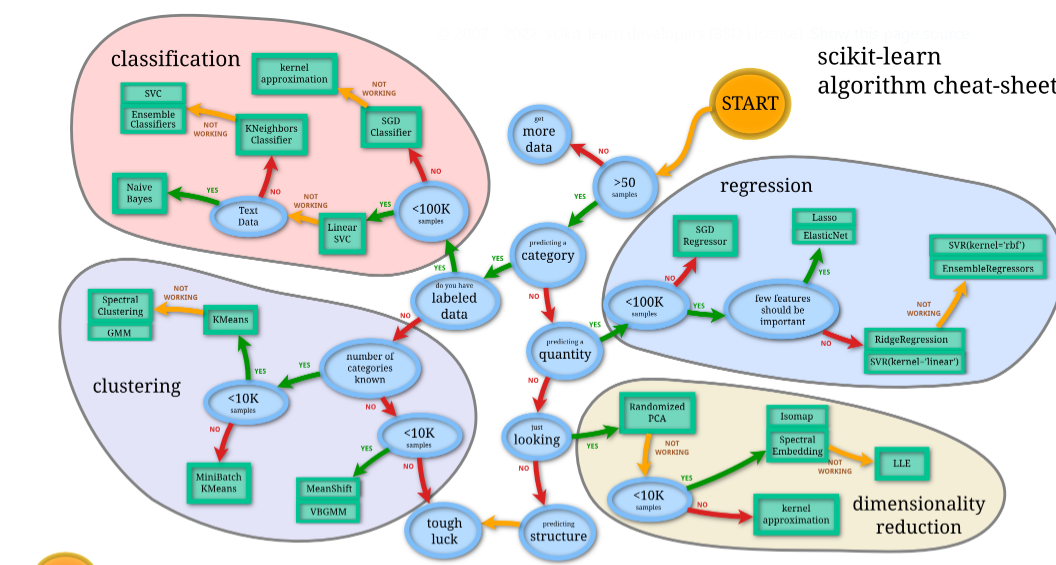

##Seleccion variables 2:

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel

KBest = SelectKBest(score_func=f_classif, k=10)
fit = KBest.fit(X,y)
var_names = fit.get_feature_names_out()

def sel_variables(modelos, X, y, SelectFromModel, np, threshold):
    var_names_ac=np.array([])
    for modelo in modelos:
      try:
        modelo.fit(X,y)
        sel = SelectFromModel(modelo, prefit=True,threshold=threshold)
        var_names= sel.get_feature_names_out(modelo.feature_names_in_)
        var_names_ac=np.append(var_names_ac, var_names)
      except ValueError:
        pass
      var_names_ac=np.unique(var_names_ac)
    return var_names_ac

var_names = sel_variables([GaussianNB(), RandomForestClassifier(), SVC(), LinearSVC(), KNeighborsClassifier()], X, y, SelectFromModel, np,threshold='1.2*mean')

In [ ]:
var_names

##Modelos a aplicar:



1.   Linea SVC
2.   Clustering
3.   Naive Bayes
4.   DecisionTree
5.   RandomForestClassifier
6.   KNeighborsClassifier


In [ ]:
from sklearn.linear_model import Ridge
# ==============================================================================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=Y_train)

In [ ]:
# Validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = Y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

In [ ]:
# Validación cruzada repetida
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = Y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
             )

print(f"Métricas de validación cruzada: {cv_scores}")
print("")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

In [ ]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = Y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

In [ ]:
# Distribución del error de validación cruzada
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.histplot(
    data    = cv_scores['test_neg_root_mean_squared_error'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")
    
sns.boxplot(
    cv_scores['test_neg_root_mean_squared_error'],
    ax      = axes[1]
)
axes[1].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada', fontsize = 10,
             fontweight = "bold");

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de validación cruzada
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Validación cruzada
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = Y_train,
                    cv        = cv
                  )

# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(Y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(Y_train))), Y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = Y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    Y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
# Validación cruzada repetida paralelizada (multicore)
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = Y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

In [ ]:
##De acuerdo a los features selecionados, se crea el nuevo dataset para el modelo
df_f = df_final1[["age","employeeid","totalworkingyears","yearsatcompany","yearswithcurrmanager","environmentsatisfaction",
                   "jobsatisfaction","attrition","businesstravel","department","educationfield","maritalstatus"
                   ,"distancefromhome","worklifebalance",'totalworkingyears', 'trainingtimeslastyear',
                    'yearssincelastpromotion']]
df_f = pd.get_dummies(df_f) ## se convierte las variables a dummies
df_f

In [ ]:
##De acuerdo a los features selecionados, se crea el nuevo dataset para el modelo
df_f = df_final1[["age","totalworkingyears","yearswithcurrmanager","environmentsatisfaction",
                   "jobsatisfaction","attrition","businesstravel","department","educationfield","maritalstatus"
                   ,"distancefromhome","worklifebalance",'totalworkingyears', 'trainingtimeslastyear',
                    'yearssincelastpromotion']]
df_f = pd.get_dummies(df_f) ## se convierte las variables a dummies
df_f

In [ ]:
##De acuerdo a los features selecionados, se crea el nuevo dataset para el modelo
df_f = df_final1[["age","totalworkingyears","yearswithcurrmanager","environmentsatisfaction",
                   "jobsatisfaction","attrition","businesstravel","department","educationfield","maritalstatus"
                   ,"distancefromhome","worklifebalance", 'trainingtimeslastyear'
                    ]]
df_f = pd.get_dummies(df_f) ## se convierte las variables a dummies
df_f

In [ ]:
##De acuerdo a los features selecionados, se crea el nuevo dataset para el modelo
df_f = df_final1[["yearswithcurrmanager",
                   "jobsatisfaction","attrition","businesstravel","department","educationfield","maritalstatus"
                   ,"distancefromhome","worklifebalance", 'trainingtimeslastyear'
                    ]]
df_f = pd.get_dummies(df_f) ## se convierte las variables a dummies
df_f

In [ ]:
## Se repite el proceso estandarización, One and Label Encoder
from sklearn.preprocessing import LabelEncoder
escalador = MinMaxScaler(feature_range=(0,1))
dReescalados = escalador.fit_transform(X)
escalador = StandardScaler().fit(X)
dEstandarizados = escalador.transform(X)
escalador = Normalizer().fit(X)
dEstandarizados = escalador.transform(X)
ohe = OneHotEncoder(sparse=False, drop='first')
dcod_f = ohe.fit_transform(X)
le = LabelEncoder()
sco_f = le.fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(dcod_f,sco_f,test_size= 0.33, random_state=6) ## División de los datos
modelo = LogisticRegression(solver='liblinear').fit(X_train, y_train) ## Crear modelos y entrenar
prediccion = modelo.predict(X_test) ## Vector de predicciones

In [ ]:
#puntaje de modelo utilizando train and test sets
modelo.score(X_train,y_train)

In [ ]:
kfld = KFold(n_splits=10, random_state=6, shuffle=True) ##Settear el kfold
modelo = LogisticRegression(solver='liblinear') #Crear el modelo
res = cross_val_score(modelo, dcod_f,sco_f, cv=kfld) #Entrenamiento y pruebas
mean= res.mean()*100 ##Score

In [ ]:
#resultado de k-fold cross validation
res

In [ ]:
#Media de k-fold cross-validation
mean

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
modelo = LogisticRegression(solver='liblinear')
res = cross_val_score(modelo, dcod_f, sco_f, cv=loo) ##Entrenamiento y pruebas
mean1= res.mean()*100 ##Score

In [ ]:
##resultados de leave one out cross-validation
res

In [ ]:
##Media de leave one out cross-validation
mean1

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
rrKfld = ShuffleSplit(n_splits=10, test_size=0.33, random_state=6)
modelo = LogisticRegression(solver='liblinear')
res = cross_val_score(modelo, dcod_f, sco_f, cv=rrKfld) ##Entrenamiento y pruebas
mean2= res.mean()*100 ##Score

In [ ]:
##resultados de repeated random test
res

In [ ]:
## media de repeated random test
mean2

Clasificacion de metricas

clasificacion Accuracy

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
modelo = LogisticRegression(solver='liblinear')
score='accuracy'
resultado = cross_val_score(modelo, dcod_f, sco_f, cv=kfold, scoring=score)
cl1= resultado.mean()*100
cl1

In [ ]:
resultado

confusion Matrix

In [ ]:

test_size=0.33
seed=6
X_train, X_test, Y_train, Y_test = train_test_split(dcod_f, sco_f, test_size=test_size,random_state=seed)
modelo = LogisticRegression(solver='liblinear')
modelo.fit(X_train, Y_train)
prediccion = modelo.predict(X_test)
matriz = confusion_matrix(Y_test,prediccion, labels=[1,0])
print(matriz)
cm = pd.DataFrame(
    confusion_matrix(Y_test, prediccion,labels=[1,0]), 
    index=['Real:{:}'.format(x) for x in [0,1]], 
    columns=['Pred:{:}'.format(x) for x in [0,1]]
)
cm

area under roc curve

In [ ]:
kfold = KFold(n_splits=10, random_state=6, shuffle=True)
modelo = LogisticRegression(solver='liblinear')
score='roc_auc'
resultado = cross_val_score(modelo, dcod_f,sco_f, cv=kfold, scoring=score)
cl2= resultado.mean()*100
cl2

Logistic loss

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
modelo = LogisticRegression(solver='liblinear')
score='neg_log_loss'
resultado = cross_val_score(modelo, dcod_f, sco_f, cv=kfold, scoring=score)
cl3= resultado.mean()*-100
cl3

Classification Report

In [ ]:
test_size=0.33
seed=6
X_train, X_test, Y_train, Y_test = train_test_split(dcod_f, sco_f, test_size=test_size,random_state=seed)
modelo = LogisticRegression(solver='liblinear')
modelo.fit(X_train, Y_train)
prediccion = modelo.predict(X_test)
reporte = classification_report(Y_test,prediccion)
print(reporte)
# recall -> predicciones correctas para una clase entre el total de registros reales de esa clase en el dataset
# precision -> predicciones correctas para una clase entre el total de predicciones realizadas por el modelo para esa clase

Selección de modelo de aprendizaje:

Linear SVC (Kernel)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn import svm
import pickle
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

In [ ]:
#Importar paquetes necesarios
clf = make_pipeline(StandardScaler(), SVC())

In [ ]:
#verificar que los datos no se encuentren duplicados, C_contiguos debe dar true
dcod_f.flags

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(dcod_f,sco_f,test_size= 0.33, random_state=6)
# Suport vector machine lineal
clf = svm.SVC(kernel='linear') #sin kernel da diferente, más alto
clf = clf.fit(X_train, y_train)
# realizar predicción con datos de prueba
y_pred = clf.predict(X_test)

In [ ]:
# Generar confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true', display_labels=["No fraude", "Si fraude"])
plt.title('Confusion matrix del estimador')
plt.show(matrix)
plt.show()

In [ ]:
#Resumen de comportamiento del modelo
svc_train_acc = accuracy_score(y_train, clf.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
#Opciones de configuración
blobs_random_seed = 42
centers = [(0,0), (5,5)]#SEPARAR LAS CLASIFICACIONES
cluster_std = 1.5 # DESVIACIÓN DE 1.5
frac_test_split = 0.33 # NúMERO RECOMENDADO
num_features_for_samples = 10
num_samples_total = 1000 #POR QUE SON 1000 REGISTROS

In [ ]:

#Generar datos
from sklearn.datasets import make_blobs
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=frac_test_split, random_state=blobs_random_seed) 

In [ ]:
# Guarda y carga temporalmente, con esto tenemos la semilla para evitar que los datos varien significativamente
np.save('./datasv.npy', (X_train, X_test, y_train, y_test))
X_train, X_test, y_train, y_test = np.load('./datasv.npy', allow_pickle=True)

In [ ]:
# Inicializar SVM classifier
clf = svm.SVC(kernel='linear')

In [ ]:
# Fit data
clf = clf.fit(X_train, y_train)

In [ ]:
#Obtener indices de support vector 
support_vector_indices = clf.support_
print(support_vector_indices) 

In [ ]:
# Obtneer numero de support vectors por clase (2)
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

In [ ]:
# obtener support vectors producidos por los propios vectores
support_vectors = clf.support_vectors_

In [ ]:
#Caso 1: Crear semilla, para evitar el cambio en la gráfica (vector machine)
#Caso 2: sin las lineas 440 y 441 Esta sesgando mucho hacia los no, teniendo en cuenta que la linea pasa por los puntos rojos
from matplotlib.colors import ListedColormap

# plotting the fgiure
plt.figure(figsize = (7,7))

# assigning the input values
X_set, y_set = X_train, y_train

# ploting the linear graph
X1, X2 = np.meshgrid(np.arange(start = X_train[:,0].min() - 1, stop = X_train[:,0].max() + 1, step = 0.01), np.arange(start = X_train[:,1].min() - 1, stop = X_train[:,1].max() + 1, step = 0.01))

# ploting scattered graph for the values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('c', 'm'))(i), label = j)

# labeling the graph
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Fraude vs No fraude')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show

In [ ]:
#Evaluación con K fold cross validation
kfld = KFold(n_splits=10, random_state=6, shuffle=True)
modelo = clf
res = cross_val_score(modelo, dcod_f,sco_f, cv=kfld)
mean= res.mean()*100
print(res)
print(mean)

In [ ]:
kfold = KFold(n_splits=10, random_state=6, shuffle=True)
modelo = clf
score='roc_auc'
resultado = cross_val_score(modelo, dcod_f,sco_f, cv=kfold, scoring=score)
cl2= resultado.mean()*100
cl2


Linear SVC

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(dcod_f,sco_f,test_size= 0.33, random_state=6)

In [ ]:
lsvc = LinearSVC(verbose=0)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score: ", score)

In [ ]:
cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

In [ ]:
#Confusion matrix
ypred = lsvc.predict(X_test)
cm = confusion_matrix(y_test, ypred)
print(cm)

In [ ]:
#Confusion matrix y classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
#Evaluar con K fold Cross-validation
kfld = KFold(n_splits=10, random_state=6, shuffle=True)
modelo = lsvc
res = cross_val_score(modelo, dcod_f, sco_f, cv=kfld)
mean= res.mean()*100
print(res)
print(mean)

In [ ]:
kfold = KFold(n_splits=10, random_state=6, shuffle=True)
modelo = lsvc
score='roc_auc'
resultado = cross_val_score(modelo, dcod_f, sco_f, cv=kfold, scoring=score)
cl2= resultado.mean()*100
cl2

Naive Bayes

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier